## Importación de Librerias

In [4]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## Definición de Ruta dataset

In [5]:
# % mkdir "01. Dataset"

In [18]:
# % mkdir 'results'

In [11]:
# % ls -lhtr '01. Dataset'

total 16M
-rw-r--r-- 1 root root 3.0K Jun 26 20:37 labels_bankruptcy.csv
-rw-r--r-- 1 root root  12M Jun 26 20:37 dataset_normalizado.csv
-rw-r--r-- 1 root root 4.0M Jun 26 20:39 dataset.csv


In [5]:
orig_dir = os.getcwd()
os.chdir("..")
os.chdir('01. Dataset')
dsets_files = glob.glob('*.csv')
for fil in dsets_files:
    if fil == 'labels_bankruptcy.csv': 
        f_labels = os.path.abspath(fil)
    if fil == 'dataset.csv':
        f_data = os.path.abspath(fil)
os.chdir(orig_dir)

In [12]:
# % ls -lhtr '01. Dataset'

total 17M
-rw-r--r-- 1 root root 3.0K Jun 26 20:37 labels_bankruptcy.csv
-rw-r--r-- 1 root root  12M Jun 26 20:37 dataset_normalizado.csv
-rw-r--r-- 1 root root 5.1M Jun 26 20:39 dataset.csv


## Dataset y etiquetas, lectura y comprensión

In [6]:
df_col = pd.read_csv(f_labels, sep=' ',names=['codes','Names'])
names_to_codes = dict(zip(df_col['Names'],df_col['codes'])) 
codes_to_names = dict(zip(df_col['codes'],df_col['Names']))
cols = ['flag']
cols = cols + list(df_col['Names'])
df = pd.read_csv(f_data, encoding = "cp1252", names=cols, skiprows=1)
df.head(5)

,flag,Cost_of_Interest-bearing_Debt,Cash_Reinvestment_Ratio,Current_Ratio,Acid_Test,Interest_Expenses/Total_Revenue,Total_Liability/Equity_Ratio,Liability/Total_Assets,Interest-bearing_Debt/Equity,Contingent_Liability/Equity,...,CFO_to_Assets,Cash_Flow_to_Equity,Realized_Gross_Profit_Growth_Rate,Operating_Income_Growth,Net_Income_Growth,Continuing_Operating_Income_after_Tax_Growth,Net_Income-Excluding_Disposal_Gain_or_Loss_Growth,Total_Asset_Growth,Total_Equity_Growth,Return_on_Total_Asset_Growth
0,1,-18.55,-19.50,-20.06,11.62,11.62,0.75,-35.62,-38.20,-36.37,...,-0.246930,24.739718,-6.018477,0.116169,-0.826436,2.346836,0.819707,-0.219948,0,0.426106
1,1,0.67,1.38,0.67,23.80,23.80,-1.26,0.02,-0.46,1.28,...,-0.002014,22.342296,-0.613081,0.238044,-0.004804,1.385773,226.014311,0.995576,0,0.721619
2,1,-7.17,-5.81,-7.63,11.61,11.49,-8.93,-70.59,-70.60,-61.66,...,-0.066410,107.094021,0.710991,0.116115,-0.222129,2.344816,0.776262,-0.288225,0,0.426473
3,1,-12.55,-14.57,-10.35,-13.24,-13.24,-22.57,-29.85,-26.20,-7.28,...,-0.176035,8.776406,-5.670492,-0.132425,-0.363423,1.064489,0.910554,-0.098232,0,0.939418
4,1,0.82,1.42,1.71,7.91,7.91,1.09,-1.00,-0.23,-2.09,...,-0.002892,10.448692,-1.529697,0.079096,-0.004567,0.579505,-0.929778,2.075525,0,1.725610


In [7]:
df.shape

(6819, 96)

## Estadísticas y Gráficos

In [8]:
def save_figure(fig,path,name):
  fname = os.path.join('results',path,name)
  with PdfPages(fname) as pdf:
    pdf.savefig(fig)

**Seaborn plots, distribuciones (resultados en carpeta /results)**

In [9]:
width = 14
height = 14

plt.style.use("default")


figures = np.array([None]*6)
axes = np.array([None]*6)
for i in range(6):
  figures[i], axes[i] = plt.subplots(nrows=4, ncols=4, figsize=(width, height))

k = 0
columns = df.columns
for i in range(6):
  for axe in axes[i].flatten():
    sns.distplot(df[columns[k]], ax=axe)
    k = k + 1
  plt.tight_layout()
  save_figure(figures[i],'.','distri_{}_{}.pdf'.format(i*16,(i+1)*16))
  figures[i].clf()

<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

In [12]:
# ls -lhtr 'results'

**Correlación de variables**

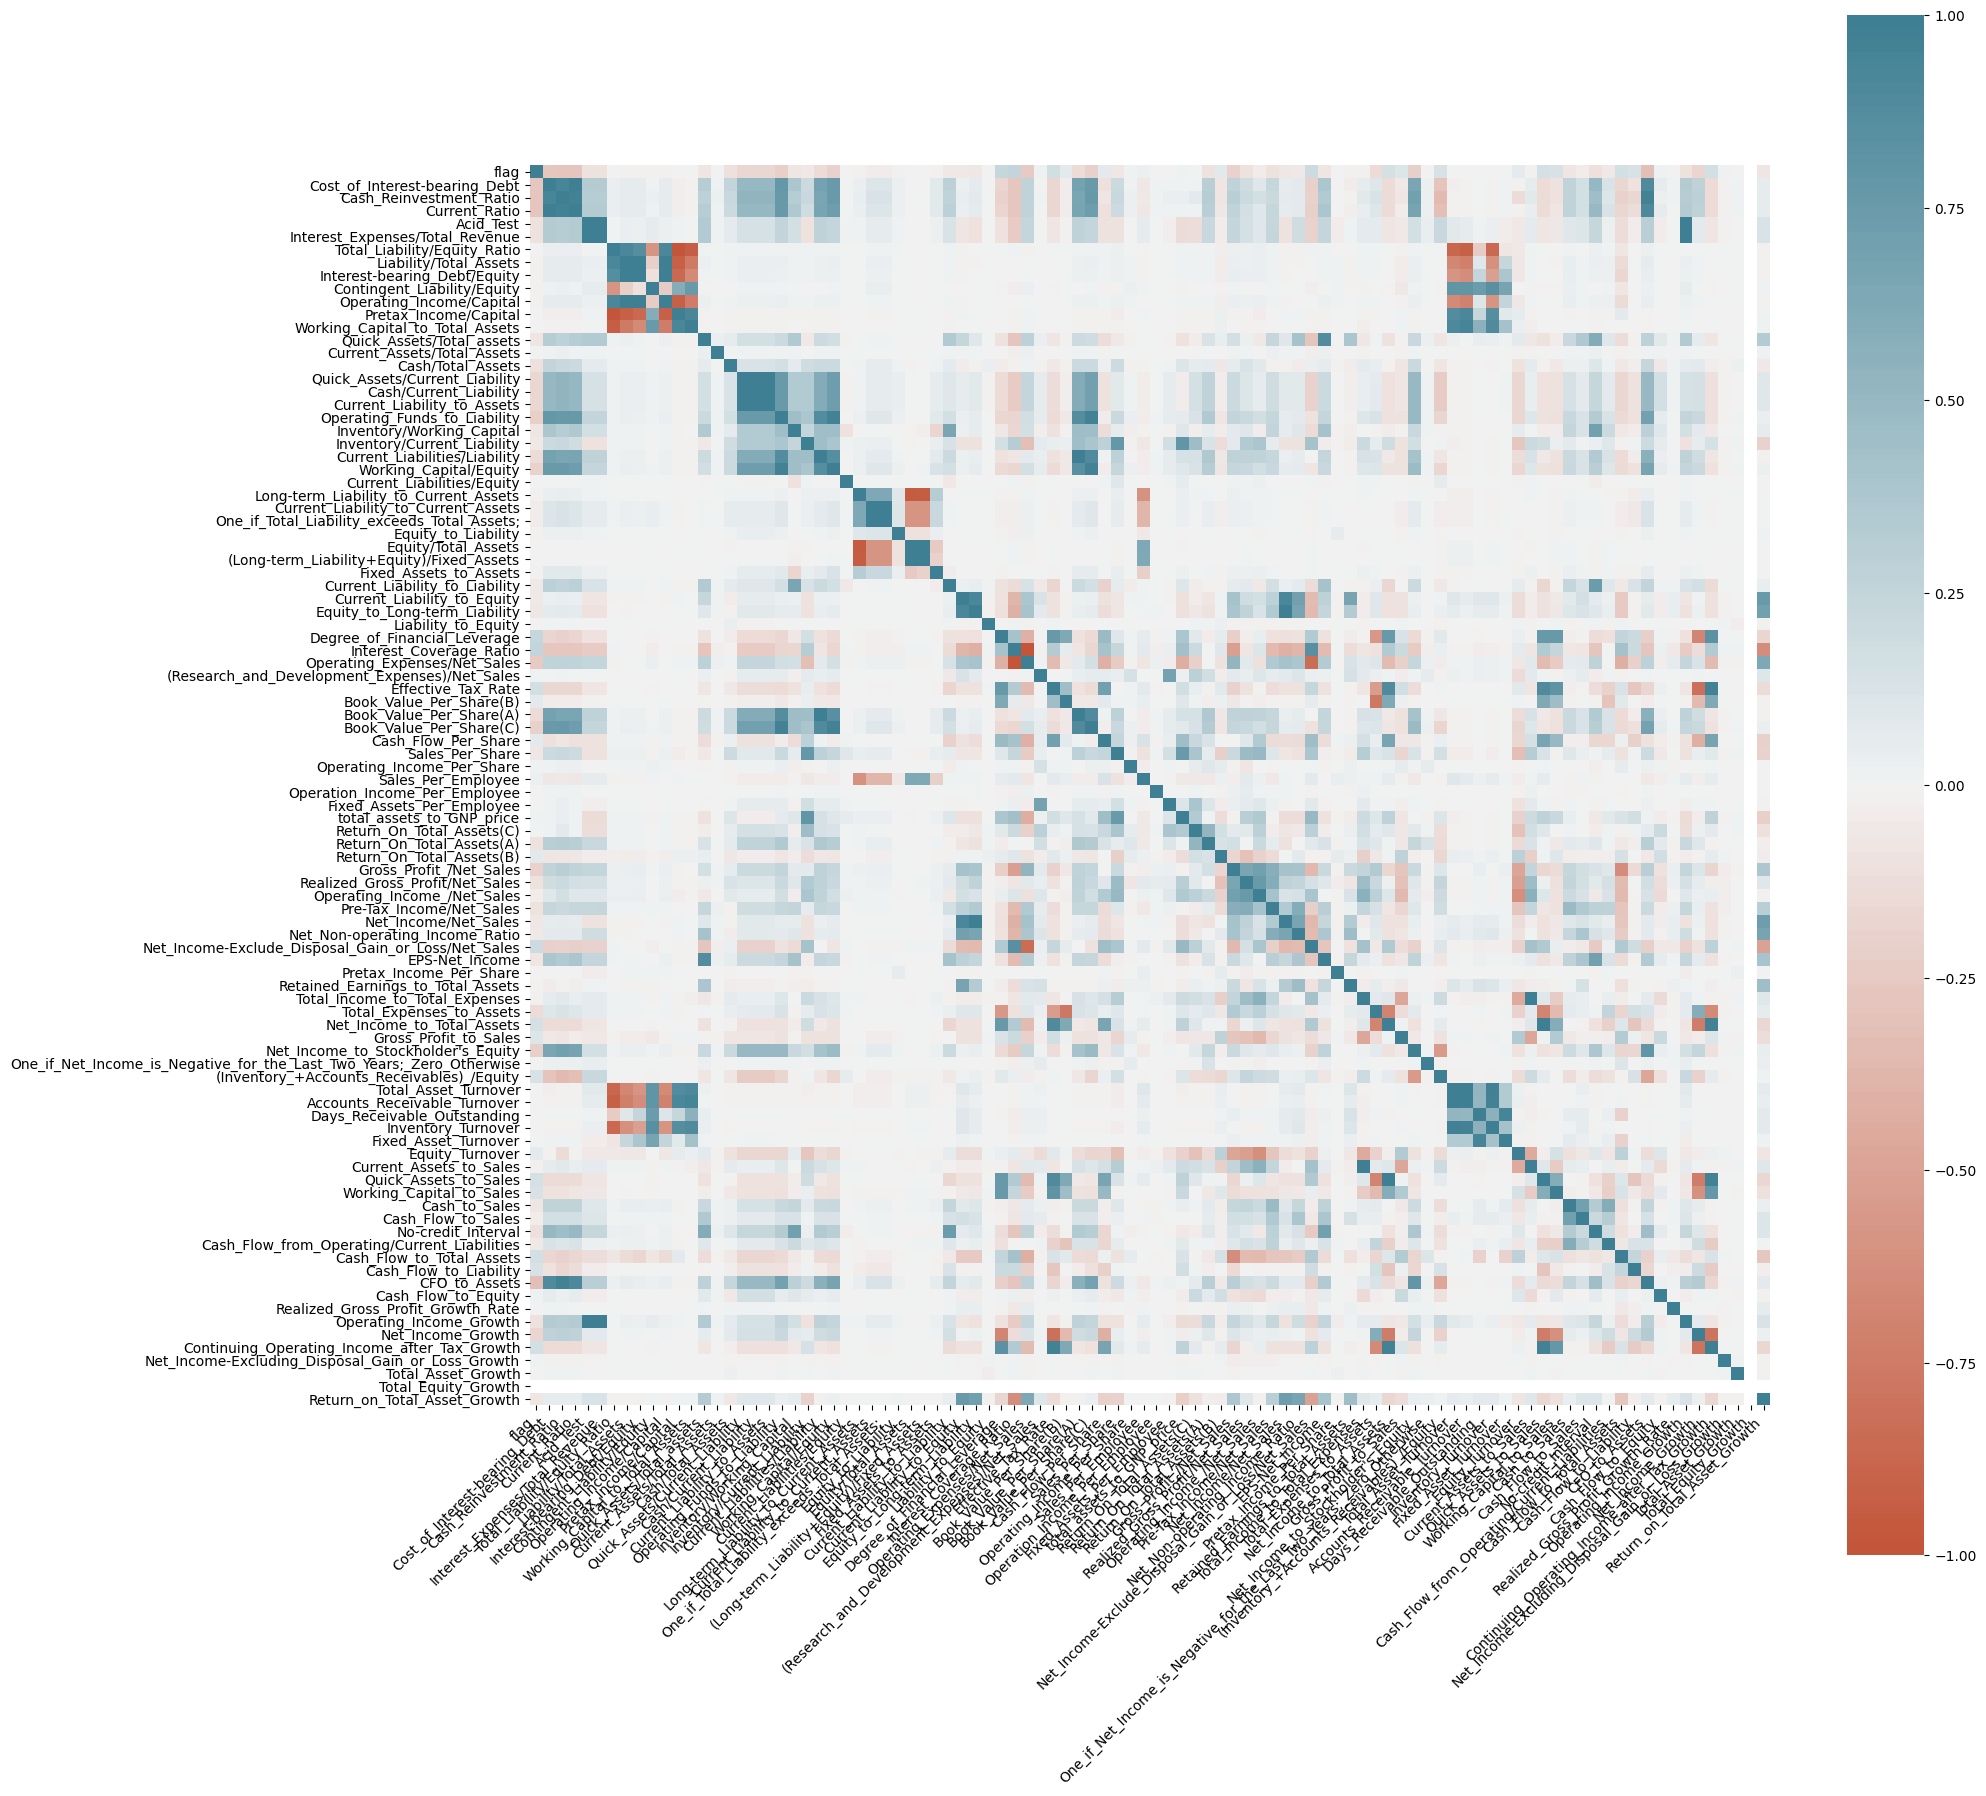

In [13]:
# Se observa en la gráfica de correlaciones, que Total_Equity_Growth no es relevante
corr = df.corr()
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    yticklabels=list(df.columns),
    xticklabels=list(df.columns),
    square=True,
    ax = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
save_figure(fig,'.','correlations.pdf')

**Características del dataframe**


In [14]:
# Notar que Total_Equity_Growth es siempre 1
# Además de evidencia que no se tiene variables categóricas
df.describe() 

,flag,Cost_of_Interest-bearing_Debt,Cash_Reinvestment_Ratio,Current_Ratio,Acid_Test,Interest_Expenses/Total_Revenue,Total_Liability/Equity_Ratio,Liability/Total_Assets,Interest-bearing_Debt/Equity,Contingent_Liability/Equity,...,CFO_to_Assets,Cash_Flow_to_Equity,Realized_Gross_Profit_Growth_Rate,Operating_Income_Growth,Net_Income_Growth,Continuing_Operating_Income_after_Tax_Growth,Net_Income-Excluding_Disposal_Gain_or_Loss_Growth,Total_Asset_Growth,Total_Equity_Growth,Return_on_Total_Asset_Growth
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,9.057498,5.124155,7.554835,20.626539,20.600773,-17.777092,-13.745951,-17.137156,4.031082,...,0.036895,23.187580,1.225363,0.206266,0.024635,0.859446,1.709683,0.039600,0.0,2.551447
std,0.176710,12.448445,12.037338,11.505294,23.497020,23.472400,1125.948719,930.240362,1044.618355,461.873816,...,0.125912,90.744524,85.961959,0.234970,0.987840,2.186950,14.826424,2.622474,0.0,3.416828
min,0.000000,-94.570000,-97.350000,-95.850000,-822.950000,-822.950000,-86454.740000,-57638.950000,-62160.000000,-12558.000000,...,-2.484834,0.075118,-4362.882979,-8.229465,-57.140534,-41.533919,-24.352217,-112.160305,0.0,-0.699003
25%,0.000000,3.180000,0.890000,2.640000,10.215000,10.200000,0.750000,0.430000,0.375000,-2.450000,...,0.002522,2.456363,-0.721056,0.102149,0.005096,0.342178,1.000000,0.000000,0.0,0.973191
50%,0.000000,8.550000,5.340000,7.310000,17.920000,17.890000,5.340000,6.050000,5.260000,0.000000,...,0.045820,5.602663,0.978108,0.179235,0.077467,0.619393,1.016058,0.018562,0.0,1.609982
75%,0.000000,15.290000,10.725000,13.255000,28.905000,28.805000,11.595000,14.380000,12.485000,2.470000,...,0.095256,14.037336,2.999350,0.289061,0.157610,1.023359,1.115473,0.112390,0.0,2.910762
max,1.000000,110.560000,86.090000,90.940000,564.630000,564.630000,89.960000,14646.480000,14646.480000,28815.790000,...,0.637044,2675.356888,2631.837963,5.646317,10.880681,109.673762,921.938272,86.297872,0.0,67.618818


**Class count**

In [15]:
# Conteo por clase, se muestra que está desbalanceado
df['flag'].value_counts() 

0    6599
1     220
Name: flag, dtype: int64